## Importing Modules

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading and setting up the dataset


Here what we are doing is trying to create a dataframe combining both train and test dataset so the task like preprocessing and feature engineering could be done at once.
in order to combine them first we create a dummy column named SalePrice which will probably be missing on test dataset and initialize all its value to 0. 
this will create equal number of columns and then we can concatinate them vertically.

In [29]:
df_1= pd.read_csv('dataset/train.csv')
df_2 = pd.read_csv('dataset/test.csv')
if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([df_1,df_2],axis=0)
df=df.set_index('Id') # unique id to the rows
df


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0


## Data Preprocessing

### Missing Values
1. First we will address missing values.

In [30]:
print((df.isnull().sum())) #no of null values in each column
print("\n")
print((df.isnull().sum())>0) #columns with null values more than 0

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType          True
SaleCondition    False
SalePrice        False
Length: 80, dtype: bool


New df with all the columns that contains null values

In [31]:
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index] 
df_null

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,21.0,NaN,AllPub,CemntBd,CmentBd,NaN,0.0,TA,TA,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,WD
2916,RM,21.0,NaN,AllPub,CemntBd,CmentBd,NaN,0.0,TA,TA,...,1970.0,Unf,1.0,286.0,TA,TA,NaN,NaN,NaN,WD
2917,RL,160.0,NaN,AllPub,VinylSd,VinylSd,NaN,0.0,TA,TA,...,1960.0,Unf,2.0,576.0,TA,TA,NaN,NaN,NaN,WD


Lets visualize the heatmap of missing values in the dataset.
We can see that there are many columns with missing values. We will address them one by one.

<Axes: ylabel='Id'>

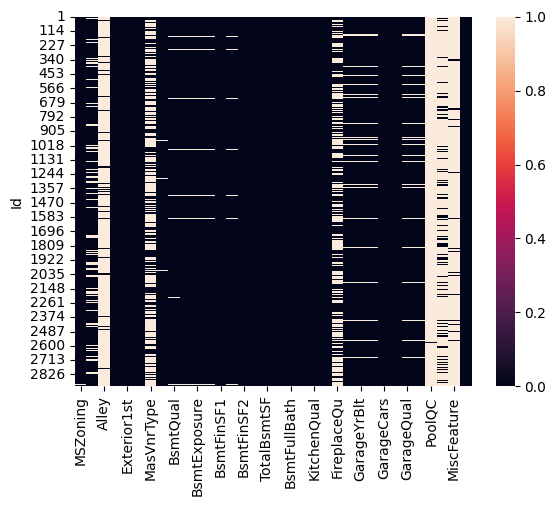

In [32]:
sns.heatmap(data=df_null.isnull())

Dropping the columns with more than 1100 missing values.

<Axes: ylabel='Id'>

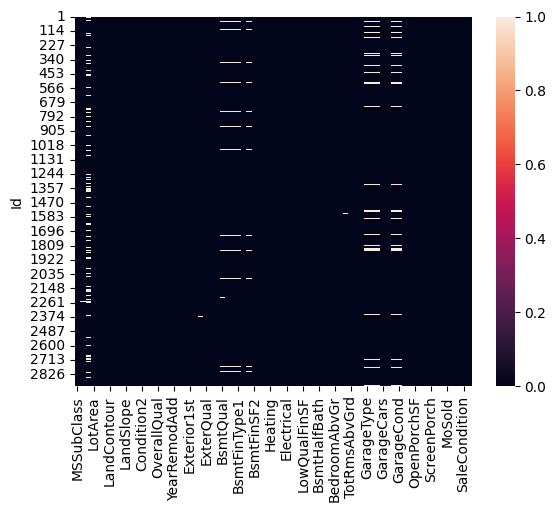

In [33]:
df_objects = df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum()>1100].index],axis=1)
sns.heatmap(data=df.isnull())

Now its time to address the null values in columns with object datatype( categorical columns). Then we will fill the missing values with a string "null". This is done in order to use one-hot encoding later on.

In [34]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum()>1100].index],axis=1)
df_objects=df_objects.fillna("null")

Time to use one-hot encoding(method used to create different columns for each of the different values in the column.)


In [35]:
df_objects['Utilities'].value_counts() 
#we see that now theres new value type in Utilities column.

df_objects_encoded = pd.get_dummies(df_objects) #one-hot encoding
df_objects_encoded

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_null,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
5,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2916,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
2917,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False


In [36]:
new_df = pd.concat([df,df_objects_encoded],axis=1)
new_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,True,False,False,False,False,False,True,False
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,False,False,True,False,False,False,False,False,True,False
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,False,False,True,False,False,False,False,False,True,False
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,False,False,True,False,True,False,False,False,False,False
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,True,False,False,False,False,False,True,False
2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,True,False,True,False,False,False,False,False
2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,True,False,True,False,False,False,False,False


In [37]:
len(new_df.columns)

321

In [38]:
len(df.columns),len(new_df.columns)

(74, 321)

In [39]:
new_df = new_df.drop(df.select_dtypes(include=['object']),axis=1) 
#dropping every string columns cause we already dealt with it.

new_df.isna().sum()[new_df.isna().sum()>0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

Now we segregate the type of the column based on the type of data it contains. This is done to apply different imputation techniques for different types of data.
Check out more advanced imputation techniques like k-nearest neighbour imputation, MICE imputation etc. for complex dataset.

In [40]:
mode_columns = ['GarageCars','GarageYrBlt','BsmtFullBath','BsmtHalfBath']
mean_columns = ['LotFrontage','LotFrontage','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','GarageArea']

for i in mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in mean_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mean())

new_df.isna().sum()[new_df.isna().sum() > 0]

Series([], dtype: int64)

Now we need to split the dataset into testing and training dataset back to our original form. Remember we concatenated the dataset vertically (meaning training dataset is on top of testing dataset.) 


In [41]:
training_data = new_df[0:len(df_1)]
testing_data = new_df[len(df_1):]
testing_data = testing_data.drop(columns='SalePrice')

In [42]:
training_data,testing_data

(      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
 Id                                                                            
 1             60         65.0     8450            7            5       2003   
 2             20         80.0     9600            6            8       1976   
 3             60         68.0    11250            7            5       2001   
 4             70         60.0     9550            7            5       1915   
 5             60         84.0    14260            8            5       2000   
 ...          ...          ...      ...          ...          ...        ...   
 1456          60         62.0     7917            6            5       1999   
 1457          20         85.0    13175            6            6       1978   
 1458          70         66.0     9042            7            9       1941   
 1459          20         68.0     9717            5            6       1950   
 1460          20         75.0     9937 

## Model Training

Importing modules from scikit learn

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [44]:
X = training_data.drop(columns='SalePrice')
y= training_data['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
y_train = np.reshape(y_train,(-1,1)) # converting one dimension to 2 dimension, -1 acts as placeholder where numpy auto calculates and places value in it.
y_test = np.reshape(y_test,(-1,1))

X_train.shape,y_train.shape

((1168, 283), (1168, 1))

### Model 1

In [49]:
model_1 = LinearRegression()
model_1.fit(X, y)
y_preds_1 = model_1.predict(X_test)
mse_1 = mean_squared_error(y_test, y_preds_1)
mse_1

367185337.40905106

### Model 2

In [51]:
model_2 = XGBRegressor(n_estimators = 1000,learning_rate = 0.1)
model_2.fit(X,y)
y_preds_2 = model_2.predict(X_test)
mse_2 = mean_squared_error(y_test,y_preds_2)
mse_2

3674.228515625

### Model 3

In [52]:
model_3 = RandomForestRegressor(n_estimators=1000)
model_3.fit(X,y)
y_preds_3 = model_3.predict(X_test)
mse_3 = mean_squared_error(y_test,y_preds_3)
mse_3

122464149.96864915

Since model 2 has the lowest mse error we will choose it.

In [53]:
preds = model_2.predict(testing_data)

final = pd.DataFrame()
final['Id'] = testing_data.index
final['SalePrice'] = preds

final.to_csv('output.csv',index=False)